# Bathymetry closeup

Get a closeup to a particular part of bathymetry file and compare with underlying gebco data.
See https://github.com/OceansAus/access-om2/issues/99

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
# Eliminate margins
# from https://stackoverflow.com/questions/44298864/how-can-i-eliminate-the-gray-border-around-jupyter-ipython-notebooks-in-my-brows
from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [1]:
%matplotlib inline
# import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import netCDF4 as nc
import IPython.display

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
# badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'


# baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

`ncdump -h /short/v45/aek156/access-om2/control/01deg_jra55_iaf/work/ocean/rregionocean_daily_30m.nc.3829`
yields
```
		xt_ocean_sub01:domain_decomposition = 1, 3600, 3331, 3375 ;
		yt_ocean_sub01:domain_decomposition = 1, 2700, 2377, 2412 ;
```

In [3]:
# location of point of interest as reported by MOM (-1 to index from 0)

imin = 3331-1
imax = 3375-1
jmin = 2377-1
jmax = 2412-1

i = (imax + imin)/2
j = (jmax + jmin)/2

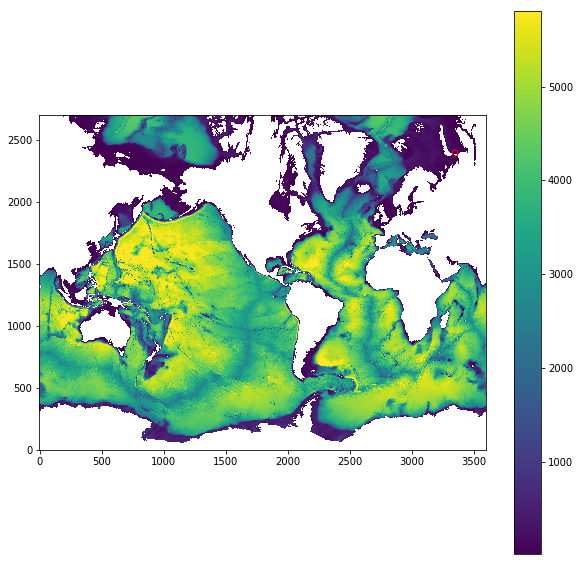

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

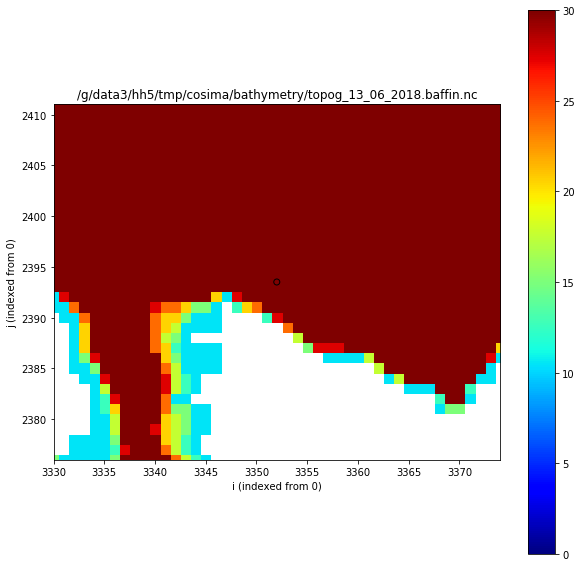

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=30, origin='lower', cmap=plt.cm.jet)
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='k')
plt.xlim(imin,imax)
plt.ylim(jmin,jmax)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');